In [1]:
import re
import pandas as pd
from konlpy.tag import Okt
from gensim import corpora, models

stopwords = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '과', '와', '의', '로', '으로', '하다', '이다','한', '했다', '하고' ,'인','적','한','상'
    ,'게', '거', '말', '간', '축', '책', '작가', '이야기', '작품', '선', '란', '개', '다시', '독자', '베스트셀러', '정세랑', '김영하', '스', '대', '됭',
    '곤', '위', '된다', '지', '윤재', '출', '속', '소설', '장편소설', '자이니치', '사라마구'
    # 추가적인 불용어 추가
]

# 데이터 로드
data = pd.read_csv(r"총신대_전처리_완료.csv")  

# 전처리를 위한 토크나이저 생성
tokenizer = Okt()

# 전처리 함수 정의
def preprocess_text(text):
    tokens = tokenizer.morphs(text)  # 형태소 분석
    tokens = [re.sub('[\[\],\']', '', token) for token in tokens]  # '['와 ']' 사이의 문자 및 ',' 제거
    tokens = [token for token in tokens if token not in stopwords]  # 불용어 제거
    tokens = [token for token in tokens if token]  # Remove empty tokens
    # 추가적인 전처리 작업 수행
    return tokens

In [2]:
from gensim.models import Word2Vec
from gensim.corpora import Dictionary
import nltk

In [3]:
# 텍스트 전처리
data['preprocessed'] = data['책소개'].apply(preprocess_text) 

In [4]:
word2vec_model = Word2Vec(data['preprocessed'], min_count=1)

dictionary = Dictionary()
dictionary.doc2bow(word2vec_model.wv.index_to_key, allow_update=True)

# 단어 사전 및 문서-단어 행렬 생성
# dictionary = corpora.Dictionary(data['preprocessed'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed']]

In [5]:
# LDA 모델 훈련
num_topics = 5 # 토픽 개수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 토픽별 단어 출력
for topic_idx in range(num_topics):
    print(f"토픽 {topic_idx+1}:")
    words = lda_model.show_topic(topic_idx, topn=10)
    for word, prob in words:
        print(f"{word}: {prob:.4f}")
    print() 

토픽 1:
주석: 0.0228
대한: 0.0132
본문: 0.0111
성경: 0.0099
연구: 0.0097
역사: 0.0077
마태복음: 0.0075
신학: 0.0071
저자: 0.0066
이해: 0.0065

토픽 2:
교회: 0.0197
개척: 0.0110
사도: 0.0099
사사기: 0.0088
역사: 0.0085
주해: 0.0084
본문: 0.0072
명령: 0.0067
신: 0.0064
학적: 0.0063

토픽 3:
주석: 0.0184
대한: 0.0099
마태복음: 0.0099
회사: 0.0098
교회: 0.0087
창세기: 0.0087
교: 0.0086
누가복음: 0.0074
저자: 0.0063
깊이: 0.0063

토픽 4:
십계명: 0.0110
성경: 0.0088
하나님: 0.0078
이해: 0.0077
기독교: 0.0076
의미: 0.0067
그리스도: 0.0067
논의: 0.0056
와의: 0.0056
연합: 0.0056

토픽 5:
신학: 0.0149
복음서: 0.0136
성경: 0.0109
공관복음: 0.0096
목격자: 0.0082
개혁: 0.0069
대조: 0.0069
기록: 0.0069
신앙: 0.0056
교수: 0.0056



In [6]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['preprocessed'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("일관성 점수:", coherence_score)

일관성 점수: 0.31934921162016905


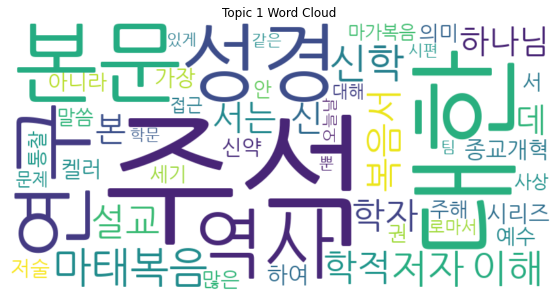

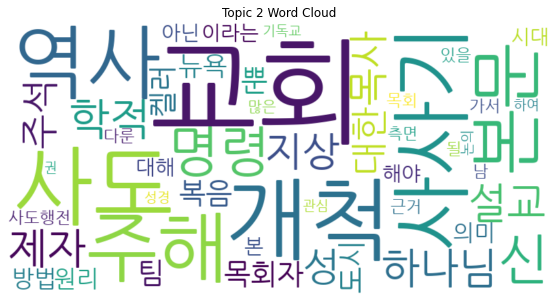

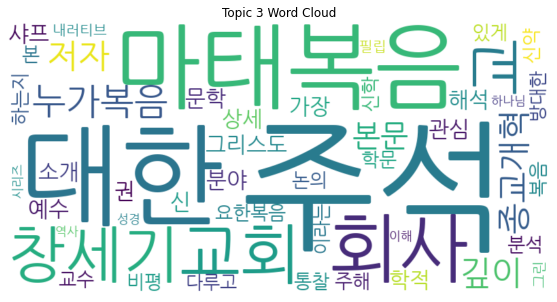

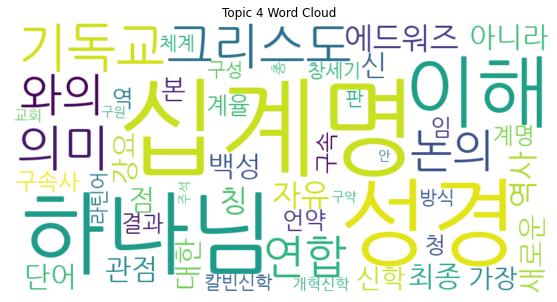

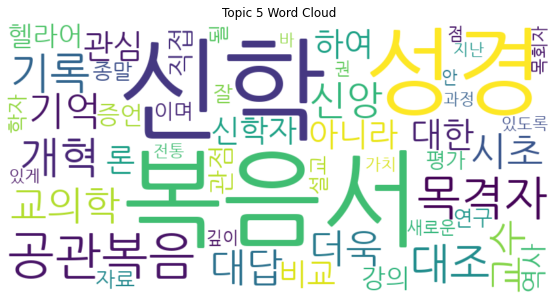

In [7]:
# 워드클라우드 코드 (각자 조정)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Generate word cloud for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=50)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx+1} Word Cloud")
    plt.axis('off')
    plt.show()

In [8]:
# 텍스트 전처리
data['preprocessed'] = data['저자소개'].apply(preprocess_text) 

In [9]:
word2vec_model = Word2Vec(data['preprocessed'], min_count=1)

dictionary = Dictionary()
dictionary.doc2bow(word2vec_model.wv.index_to_key, allow_update=True)

# 단어 사전 및 문서-단어 행렬 생성
# dictionary = corpora.Dictionary(data['preprocessed'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed']]

In [10]:
# LDA 모델 훈련
num_topics = 5 # 토픽 개수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 토픽별 단어 출력
for topic_idx in range(num_topics):
    print(f"토픽 {topic_idx+1}:")
    words = lda_model.show_topic(topic_idx, topn=10)
    for word, prob in words:
        print(f"{word}: {prob:.4f}")
    print() 

토픽 1:
신학: 0.0289
대학교: 0.0196
대학원: 0.0174
교회: 0.0162
교수: 0.0139
신학교: 0.0128
하였다: 0.0105
총신대: 0.0083
하여: 0.0082
대학: 0.0082

토픽 2:
신학: 0.0317
총신대: 0.0204
설교: 0.0176
시편: 0.0174
강해: 0.0119
대학원: 0.0091
신학교: 0.0090
엠마: 0.0090
출판: 0.0090
부: 0.0089

토픽 3:
교회: 0.0143
스코틀랜드: 0.0107
성경: 0.0085
윌리엄: 0.0073
함: 0.0073
종교개혁: 0.0073
커닝: 0.0073
사상: 0.0073
하여: 0.0072
신학: 0.0063

토픽 4:
신학: 0.0240
주석: 0.0161
신약: 0.0144
연구: 0.0143
신학교: 0.0131
대학교: 0.0127
미국: 0.0106
로는: 0.0103
시리즈: 0.0097
약학: 0.0096

토픽 5:
생명: 0.0307
말씀: 0.0306
신학: 0.0208
총신대: 0.0162
학위: 0.0144
네덜란드: 0.0129
교회: 0.0127
여호와: 0.0110
하였다: 0.0110
대학원: 0.0105



In [11]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['preprocessed'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("일관성 점수:", coherence_score)

일관성 점수: 0.47807134962816955


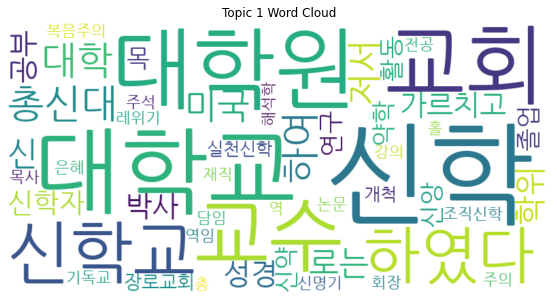

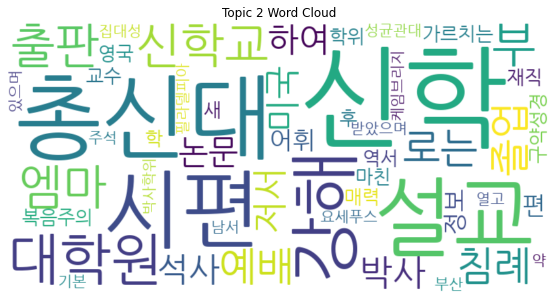

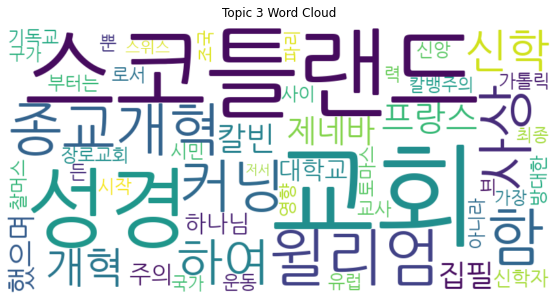

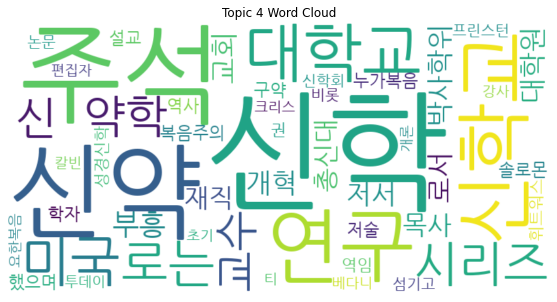

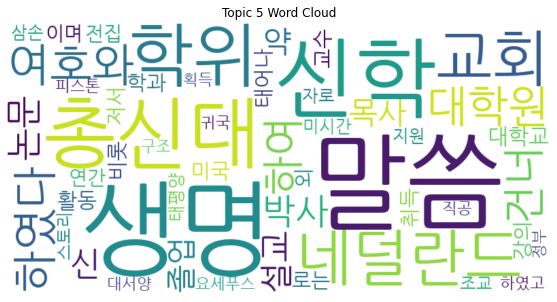

In [12]:
# 워드클라우드 코드 (각자 조정)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Generate word cloud for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=50)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx+1} Word Cloud")
    plt.axis('off')
    plt.show()